In [155]:
import pandas as pd 
import numpy as np

In [156]:
#Chargons les données
raw_data=pd.read_csv("datset_mushrooms.csv",sep=',')

In [157]:
raw_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [158]:
raw_data["cap-shape"].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [159]:
#prétaraitement

from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()

for col in raw_data.columns:

    raw_data[col]=labelencoder.fit_transform(raw_data[col])

raw_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [160]:
#Choisissons nos X et y 

X=raw_data.iloc[:,1:23]
y=raw_data.iloc[:,0]


In [161]:
#Séparation en training et test 
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


In [162]:
print("taille du X train :", X_train.shape)
print("taille du Y train :", y_train.shape)

taille du X train : (5686, 22)
taille du Y train : (5686,)


In [163]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(solver = 'liblinear')

lr.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [164]:
from sklearn import metrics
#On récupère la prédiction des valeurs postifis 
y_prob=lr.predict_proba(X_test)[:,1]

print(y_prob.shape)

[fpr,tpr,thr]=metrics.roc_curve(y_test,y_prob)



(2438,)


In [165]:

print("Les valeurs des vrais positifs sont :\n ",tpr)


Les valeurs des vrais positifs sont :
  [0.00000000e+00 8.65800866e-04 3.41125541e-01 3.41125541e-01
 3.67099567e-01 3.67099567e-01 3.80952381e-01 3.80952381e-01
 3.83549784e-01 3.83549784e-01 3.90476190e-01 3.90476190e-01
 3.94805195e-01 3.94805195e-01 3.98268398e-01 3.98268398e-01
 4.01731602e-01 4.01731602e-01 4.08658009e-01 4.08658009e-01
 4.13852814e-01 4.13852814e-01 4.67532468e-01 4.67532468e-01
 5.44588745e-01 5.44588745e-01 5.70562771e-01 5.70562771e-01
 7.06493506e-01 7.06493506e-01 7.54112554e-01 7.54112554e-01
 7.58441558e-01 7.58441558e-01 7.60173160e-01 7.60173160e-01
 8.43290043e-01 8.43290043e-01 8.46753247e-01 8.46753247e-01
 8.56277056e-01 8.56277056e-01 8.58874459e-01 8.58874459e-01
 8.62337662e-01 8.62337662e-01 8.65800866e-01 8.65800866e-01
 8.75324675e-01 8.75324675e-01 8.76190476e-01 8.76190476e-01
 8.78787879e-01 8.78787879e-01 8.79653680e-01 8.79653680e-01
 8.84848485e-01 8.84848485e-01 8.85714286e-01 8.85714286e-01
 8.86580087e-01 8.86580087e-01 8.89177489e-01

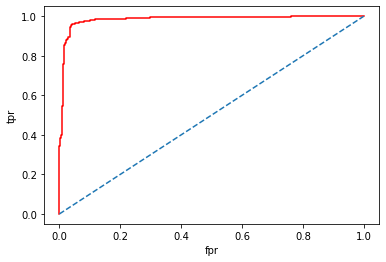

In [166]:
import matplotlib.pyplot as plt 

plt.plot(fpr,tpr,color="red")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.plot([0,1],[0,1],linestyle='--')
plt.show()

In [167]:
roc_auc=metrics.auc(fpr,tpr)

print("la surface sous la courbe AUC sans régularisation: ",roc_auc)

la surface sous la courbe AUC sans régularisation:  0.9847698677004991


In [168]:
#Pour la régularisation on applique une validation croisée pour trouver le meilleur hyperparametre

from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(solver = 'liblinear')
params={"C":np.logspace(-3,3,7),"penalty":["l2"]}

glr=GridSearchCV(lr,params,cv=10)

In [169]:
glr.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2']})

In [170]:
glr.best_params_

{'C': 1000.0, 'penalty': 'l2'}

In [171]:
y_prob=glr.predict_proba(X_test)[:,1]
[fpr,tpr,thr]=metrics.roc_curve(y_test,y_prob)


Text(0, 0.5, 'Tpr')

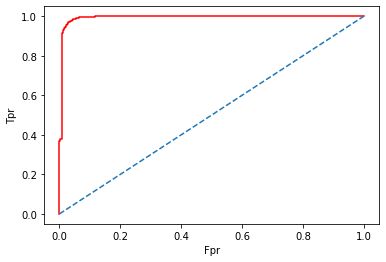

In [172]:
plt.plot(fpr,tpr,color="red")
plt.plot([0,1],[0,1],linestyle="--")
plt.xlabel("Fpr")
plt.ylabel("Tpr")


In [173]:
print("la surface sous la courbe AUC pour la régularisation :",metrics.auc(fpr,tpr))

la surface sous la courbe AUC pour la régularisation : 0.9935237015517607


In [195]:
from sklearn.svm import LinearSVC
svm=LinearSVC(dual=False)

params={"C":np.logspace(-3,3,7)}

gsvm=GridSearchCV(svm,params,cv=10)

In [196]:
gsvm.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LinearSVC(dual=False),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})

In [199]:
gsvm.best_params_

{'C': 100.0}

In [201]:
y_prob=gsvm.predict(X_test)
[fpr,tpr,thr]=metrics.roc_curve(y_test,y_prob)

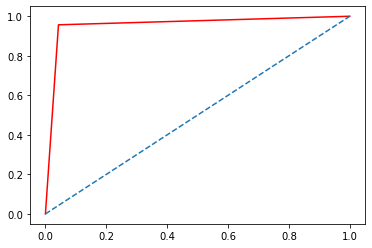

In [203]:
plt.plot(fpr,tpr,color="red")
plt.plot([0,1],[0,1],linestyle='--')

In [204]:
print("la surface sous la courbe AUC pour le SVM est : " ,metrics.auc(fpr,tpr))

la surface sous la courbe AUC pour le SVM est :  0.956920839617644


In [208]:
from sklearn import neighbors 
param_grid={"n_neighbors":[3,5,7,9,11,13,15]}

score="accuracy"

clf=GridSearchCV(
    neighbors.KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring=score 
    )

clf.fit(X_train,y_train)

print("Meilleur hyperparametre sur le jeu d'entrainement : ")
print(clf.best_params_)


Meilleur hyperparametre sur le jeu d'entrainement : 
{'n_neighbors': 5}


In [210]:
y_prob=clf.predict_proba(X_test)[:,1]
[fpr,tpr,thr]=metrics.roc_curve(y_test,y_prob)


Text(0, 0.5, 'Tpr')

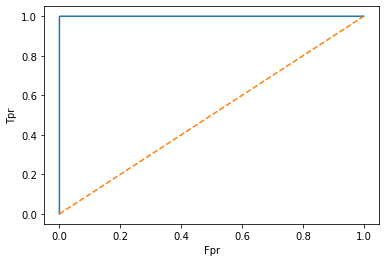

In [213]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel("Fpr")
plt.ylabel("Tpr")

In [214]:
print("la surface AUC pour KNN est : ",metrics.auc(fpr,tpr))

la surface AUC pour KNN est :  0.9999976381114338
